In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("MWDD-export.csv")
df = df.dropna(subset=df.columns)
df.head

<bound method NDFrame.head of                          wdid       icrsra       icrsdec     teff   logg  \
0                 * alf CMa B  06 45 08.79  -16 43 15.36  26083.0  8.610   
1                 * alf CMi B  07 39 17.88   05 13 26.76   7585.0  7.964   
2               * omi02 Eri B  04 15 19.39  -07 40 22.63  16265.0  7.916   
6       1RXS J000359.1+433600  00 03 58.84   43 36 01.64  46850.0  9.050   
7       1RXS J023947.9+500349  02 39 48.39   50 03 48.27  34150.0  8.670   
...                       ...          ...           ...      ...    ...   
144843           [ZHV2014] 64  10 23 08.52   00 23 30.22   7455.0  5.547   
144844          [ZHV2014] 646  12 38 18.71   09 04 39.84   7264.0  5.506   
144845          [ZHV2014] 647  12 38 19.04   09 08 13.67   9514.0  6.000   
144846          [ZHV2014] 648  12 38 20.73  -02 50 44.68   7781.0  5.803   
144847          [ZHV2014] 901  13 10 34.19   00 42 05.64   7540.0  5.960   

           mass  
0       0.94000  
1       0.55410  
2  

In [3]:
M_SOLAR = 1.989e+30
G = 6.674e-11

def g2r(surface_g, mass):
    g = 10 ** surface_g / 100
    mass_kg = mass * M_SOLAR

    radius = np.sqrt(G * mass_kg / g)

    return radius / 1000 # m to km

radius = g2r(df['logg'], df['mass'])
df['radius'] = radius

/Users/caritsang/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df.columns

Index(['wdid', 'icrsra', 'icrsdec', 'teff', 'logg', 'mass', 'radius'], dtype='object')

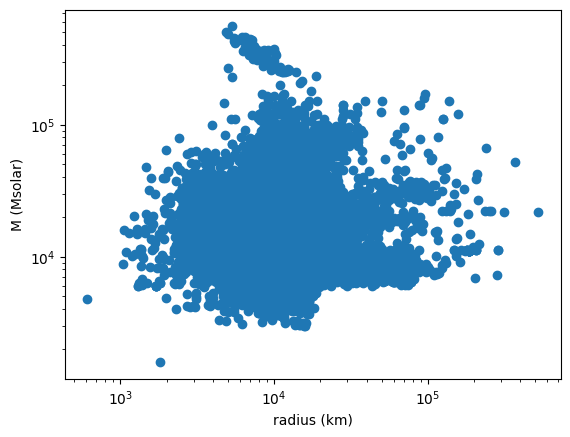

In [9]:
plt.scatter(df['radius'], df['teff'])
#plt.ylim(0, 15)
#plt.xlim(0, 50000)
plt.xlabel("radius (km)")
plt.ylabel("M (Msolar)")
plt.xscale('log')
plt.yscale('log')

In [107]:
def dms2deg(dms_string):

    data = []
    for datum in dms_string:
        parts = datum.split()

        degrees = float(parts[0])
        minutes = float(parts[1])
        seconds = float(parts[2])

        sign = -1 if degrees < 0 else 1

        deg = degrees * 15 + sign * (minutes * 15 / 60) + sign * (seconds * 15 / 3600)
        rad = np.deg2rad(deg)

        if rad > np.pi:
            rad -= 2 * np.pi

        data.append(rad)

    return pd.Series(data)
#df['dec'] = dms2deg(df['icrsdec'])
df['ra'] = dms2deg(df['icrsra'])

(array([ 9322., 10573.,  9934., 10418.,  9975., 10807.,  8754.,  9620.,
        14192., 10365.]),
 array([-3.14148502e+00, -2.51317762e+00, -1.88487022e+00, -1.25656281e+00,
        -6.28255408e-01,  5.19962673e-05,  6.28359401e-01,  1.25666680e+00,
         1.88497421e+00,  2.51328161e+00,  3.14158902e+00]),
 <BarContainer object of 10 artists>)

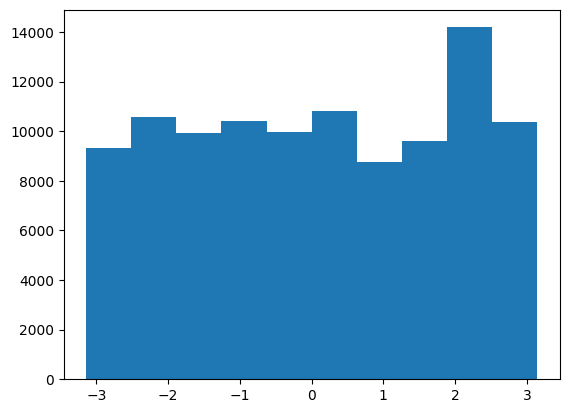

In [108]:
plt.hist(df['ra'])

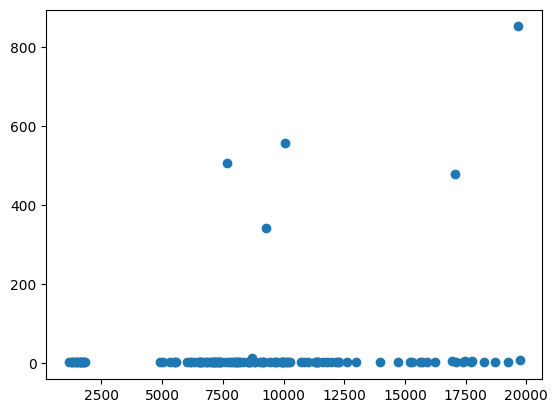

In [130]:
filtered_df = df[(df['radius'] < 20000) & (df['mass']> 1.5)]
plt.scatter(filtered_df['radius'], filtered_df['mass'])

/var/folders/f5/93qk9czs7835g6z9_k6k6wvc0000gn/T/ipykernel_10007/413007533.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_df.corr(), cmap='coolwarm')


<Axes: >

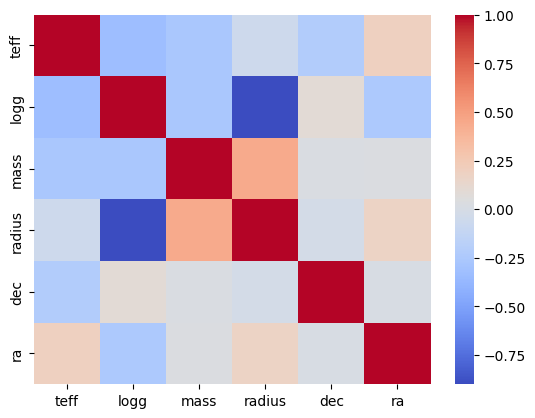

In [117]:
sns.heatmap(filtered_df.corr(), cmap='coolwarm')

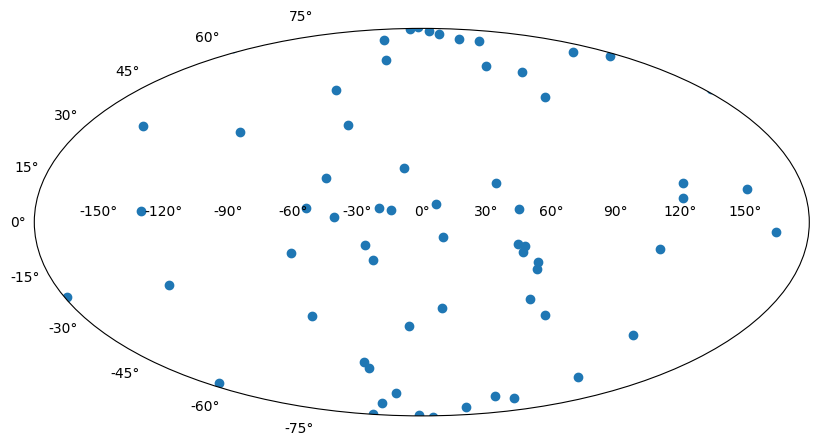

In [132]:
fig = plt.figure(figsize=(10, 8))
# Use 'aitoff' projection for the full-sky map
ax = fig.add_subplot(111, projection="aitoff")

# Plot the points. Use mass for the color scale.
sc = ax.scatter(dms2deg(filtered_df['icrsra']), dms2deg(filtered_df['icrsdec']))